In [64]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings

#Upload from CSVs
crops_path = "New Files/crop_production.csv"
climate_path = "New Files/climdiv_state_year.csv"

#Read data and results
crops_df = pd.read_csv(crops_path)
climate_df = pd.read_csv(climate_path)

crops_df.head()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,VALUE
0,0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607
1,1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737
2,2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340
3,3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000
4,4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815


In [65]:
#Filter by USA
crops_df = crops_df.loc[crops_df["LOCATION"]=="USA"]

crops_df


,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,VALUE
468,468,USA,CROPYIELD,RICE,TONNE_HA,A,1990,4.313679
469,469,USA,CROPYIELD,RICE,TONNE_HA,A,1991,4.468591
470,470,USA,CROPYIELD,RICE,TONNE_HA,A,1992,4.473428
471,471,USA,CROPYIELD,RICE,TONNE_HA,A,1993,4.301207
472,472,USA,CROPYIELD,RICE,TONNE_HA,A,1994,4.651018
...,...,...,...,...,...,...,...,...
19029,19029,USA,CROPYIELD,SOYBEAN,THND_TONNE,A,2021,110511.658000
19030,19030,USA,CROPYIELD,SOYBEAN,THND_TONNE,A,2022,111686.891300
19031,19031,USA,CROPYIELD,SOYBEAN,THND_TONNE,A,2023,112811.555500
19032,19032,USA,CROPYIELD,SOYBEAN,THND_TONNE,A,2024,113261.546400


In [66]:
#Find Unique Values
crops_df["SUBJECT"].unique()

array(['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN'], dtype=object)

In [67]:
#Sort by types
crops_wheat_df = crops_df.loc[(crops_df["SUBJECT"]=="RICE") & (crops_df["MEASURE"]=="TONNE_HA") & (crops_df["TIME"]<2024)]

crops_rice_df = crops_df.loc[(crops_df["SUBJECT"]=="WHEAT") & (crops_df["MEASURE"]=="TONNE_HA")& (crops_df["TIME"]<2024)]

crops_maize_df = crops_df.loc[(crops_df["SUBJECT"]=="MAIZE") & (crops_df["MEASURE"]=="TONNE_HA")& (crops_df["TIME"]<2024)]

crops_soybean_df = crops_df.loc[(crops_df["SUBJECT"]=="SOYBEAN") & (crops_df["MEASURE"]=="TONNE_HA")& (crops_df["TIME"]<2024)]

In [68]:
#Reduce Columns
crops_wheat_df = crops_wheat_df[["SUBJECT", "TIME", "VALUE"]]

crops_rice_df = crops_rice_df[["SUBJECT", "TIME", "VALUE"]]

crops_maize_df = crops_maize_df[["SUBJECT", "TIME", "VALUE"]]

crops_soybean_df = crops_soybean_df[["SUBJECT", "TIME", "VALUE"]]

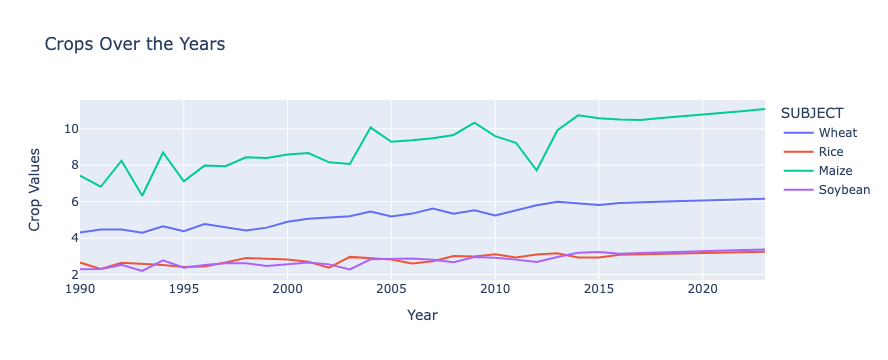

In [69]:
#Plot Values

# Concatenate the data frames
crops_wheat_df["SUBJECT"] = "Wheat"
crops_rice_df["SUBJECT"] = "Rice"
crops_maize_df["SUBJECT"] = "Maize"
crops_soybean_df["SUBJECT"] = "Soybean"

concatenated_df = pd.concat([crops_wheat_df, crops_rice_df, crops_maize_df, crops_soybean_df], ignore_index=True)

# Create the interactive plot using Plotly
fig = px.line(concatenated_df, x="TIME", y="VALUE", color="SUBJECT",
              title="Crops Over the Years")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Crop Values")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

In [70]:
#Sort Climate numbers
climate_df = climate_df.loc[climate_df["year"]>=1990]

#Reduce to only columns needed
climate_df = climate_df[["year", "tempc"]]

climate_df

,year,tempc
95,1990,18.287037
96,1991,17.754630
97,1992,16.726852
98,1993,16.847222
99,1994,17.250000
...,...,...
5995,2015,6.754630
5996,2016,6.615741
5997,2017,6.222222
5998,2018,5.782407


In [71]:
#Drop duplicates
climate_df = climate_df.drop_duplicates(subset="year")

#Rename Columns
climate_df = climate_df.rename(columns={"year":"TIME"})
#Check Value Counts
climate_df.value_counts()

TIME  tempc    
1990  18.287037    1
1991  17.754630    1
2018  18.027778    1
2017  18.351852    1
2016  18.523148    1
2015  18.120370    1
2014  16.685185    1
2013  17.000000    1
2012  18.287037    1
2011  17.685185    1
2010  17.060185    1
2009  17.171296    1
2008  17.175926    1
2007  18.000000    1
2006  17.888889    1
2005  17.439815    1
2004  17.407407    1
2003  17.074074    1
2002  17.541667    1
2001  17.240741    1
2000  17.537037    1
1999  17.856481    1
1998  18.402778    1
1997  16.870370    1
1996  16.736111    1
1995  17.240741    1
1994  17.250000    1
1993  16.847222    1
1992  16.726852    1
2019  18.541667    1
Name: count, dtype: int64

In [73]:
#Merge with Maize
climate_maize_df = pd.merge(climate_df, crops_maize_df, how="inner", on = "TIME")

climate_maize_df.head()

,TIME,tempc,SUBJECT,VALUE
0,1990,18.287037,Maize,7.433033
1,1991,17.754630,Maize,6.819797
2,1992,16.726852,Maize,8.250576
3,1993,16.847222,Maize,6.322854
4,1994,17.250000,Maize,8.698690


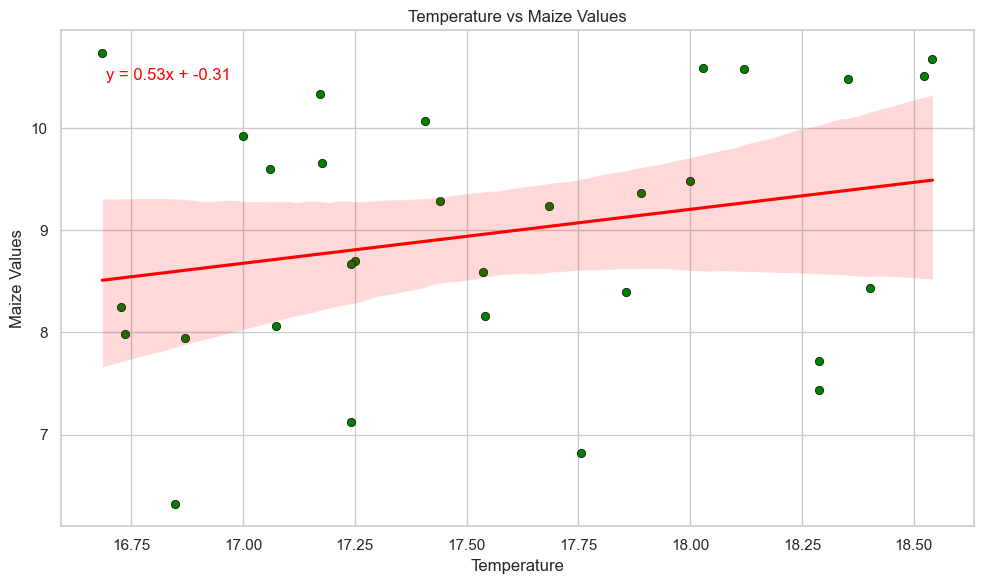

In [74]:
# production of red meat using seaborn

# Scatter plot with regression line 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=climate_maize_df, x="tempc", y="VALUE", color="green", edgecolor="black")
sns.regplot(data=climate_maize_df, x="tempc", y="VALUE", scatter=False, color="red")

# Adding regression equation
x = climate_maize_df["tempc"]
y = climate_maize_df["VALUE"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding labels and title
plt.xlabel("Temperature")
plt.ylabel("Maize Values")
plt.title("Temperature vs Maize Values")

# Save the plot
# plt.savefig("red_meat_population_regression.png")

plt.tight_layout()
plt.show()


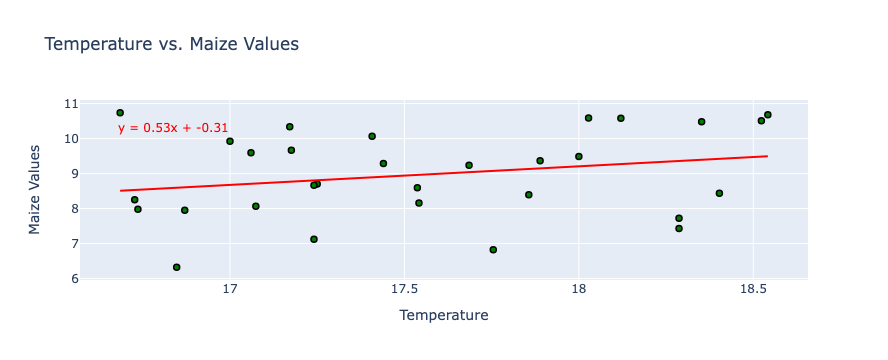

In [75]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(climate_maize_df, x="tempc", y="VALUE", trendline="ols", 
                 trendline_color_override="red", labels={"tempc": "Temperature", "VALUE": "Maize Values"},
                 title="Temperature vs. Maize Values")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")